# Trump Tweets Exploratory Analysis

## Loading Trump's Tweets

In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
import statistics
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /Users/chris0519/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [22]:
def tokenize(phrase):
    '''
    Returns an array of individual words in the string phrase
    phrase: The string to be tokenized
    '''
    tokens = nltk.word_tokenize(phrase)
    return tokens

In [23]:
# Load Trump's tweets
trump_tweets = pd.read_csv("trump_tweets.csv")
number_of_trump_tweets = len(trump_tweets.index) #Number of tweets we collected
print(trump_tweets.head())
print("Number of tweets: " + str(number_of_trump_tweets))

   Unnamed: 0                   id  \
0           0  1314035056441257985   
1           1  1314033009293656065   
2           2  1314028978806624256   
3           3  1314028699084259329   
4           4  1314027975185182721   

                                           full_text  \
0                            https://t.co/wHQx2qd8q2   
1  2010 to 2016 under Kamala Harris's watch as "T...   
2    https://t.co/4Wv5cCFEns https://t.co/kMvBv6Pu9I   
3                            https://t.co/rxqPqR4uqZ   
4                            https://t.co/xGevgI2wTO   

                                            entities           created_at  \
0  {'hashtags': [], 'symbols': [], 'user_mentions...  2020-10-08 02:49:05   
1  {'hashtags': [], 'symbols': [], 'user_mentions...  2020-10-08 02:40:57   
2  {'hashtags': [], 'symbols': [], 'user_mentions...  2020-10-08 02:24:56   
3  {'hashtags': [], 'symbols': [], 'user_mentions...  2020-10-08 02:23:49   
4  {'hashtags': [], 'symbols': [], 'user_mentions

In [24]:
# Converting create_at column to datetime for later analysis use.
trump_tweets['datetime']=pd.to_datetime(trump_tweets['created_at'], format='%Y-%m-%d %H:%M:%S')
trump_tweets['date']=trump_tweets['datetime'].dt.date

#number of tweets by day

tweetsbyday=trump_tweets.date.value_counts()
print(trump_tweets['date'])
print(tweetsbyday)

dataframetweetsbyday = pd.DataFrame(np.array([trump_tweets['date'], [tweetsbyday]]))

0       2020-10-08
1       2020-10-08
2       2020-10-08
3       2020-10-08
4       2020-10-08
           ...    
1602    2020-07-11
1603    2020-07-11
1604    2020-07-11
1605    2020-07-11
1606    2020-07-11
Name: date, Length: 1607, dtype: object
2020-09-30    62
2020-10-07    48
2020-08-25    45
2020-09-08    44
2020-09-18    41
              ..
2020-10-02     3
2020-07-18     3
2020-09-19     3
2020-07-20     2
2020-07-22     2
Name: date, Length: 89, dtype: int64


## Summary Statistics

In [25]:
print("Mean of number of favourites Trump's tweets get is: {:.2f}".format(trump_tweets['favourite'].mean()));
print("Mean of number of retweets Trump's tweets get is: {:.2f}".format(trump_tweets['retweets'].mean()));

Mean of number of favourites Trump's tweets get is: 100213.01
Mean of number of retweets Trump's tweets get is: 23074.06


In [65]:
# Summary stats for the full_text column
trump_total_words = 0 # The number of words Trump used across all the Tweets we collected
trump_word_counts_list = [] # A list of the word count for each tweet
for tweet in trump_tweets["full_text"]:
    tweet_length = len(tokenize(tweet))
    trump_word_counts_list.append(tweet_length)                 
    trump_total_words += tweet_length
print("Trump words tweeted: " + str(trump_total_words))
trump_mean_wordcount = np.mean(trump_word_counts_list) #Mean number of words in each of Trump's tweets
print("Mean number of words in each Trump tweet: {:.2f}".format(trump_mean_wordcount))
trump_median_wordcount = np.median(trump_word_counts_list)
print("Median number of words in each Trump tweet: {:.2f}".format(trump_median_wordcount))
trump_mode_wordcount = statistics.mode(trump_word_counts_list)
print("Mode number of words in each Trump tweet: {:.2f}".format(trump_mode_wordcount))
trump_minimum_words = min(trump_word_counts_list)
print("The least number of words Trump used in a tweet was: {:.2f}".format(trump_minimum_words))
trump_maximum_words = max(trump_word_counts_list)
print("The most number of words Trump used in a tweet was: {:.2f}".format(trump_maximum_words))
trump_stddev_wordcount = np.std(trump_word_counts_list)
print("Standard deviation of number of words in each Trump tweet: {:.2f}".format(trump_stddev_wordcount))

Trump words tweeted: 42295
Mean number of words in each Trump tweet: 26.32
Median number of words in each Trump tweet: 20.00
Mode number of words in each Trump tweet: 3.00
The least number of words Trump used in a tweet was: 3.00
The most number of words Trump used in a tweet was: 76.00
Standard deviation of number of words in each Trump tweet: 21.06


In [63]:
# Summary stats for the "favourite" column
trump_favorites = trump_tweets["favourite"]
trump_total_favorites = trump_favorites.sum()
print("Trump tweet favorites: {:.2f}".format(trump_total_favorites))
trump_mean_favorites = np.mean(trump_favorites)
print("Mean number of favorites for Trump tweets: {:.2f}".format(trump_mean_favorites))
trump_median_favorites = np.median(trump_favorites)
print("Median number of favorites for Trump tweets: {:.2f}".format(trump_median_favorites))
# Mode may not be meaningful due to the wide range between the minimum and maximum number of favorites
# trump_mode_favorites = statistics.mode(trump_favorites)
# print("Mode number of favorites in each Trump tweet: " + str(trump_mode_favorites))
trump_minimum_favorites = min(trump_favorites)
print("The least number of favorites a Trump tweet received was: {:.2f}".format(trump_minimum_favorites))
trump_maximum_favorites = max(trump_favorites)
print("The most number of favorites a Trump tweet received was: {:.2f}".format(trump_maximum_favorites))
trump_stddev_favorites = np.std(trump_favorites)
print("Standard deviation of number of retweets for Trump tweets: {:.2f}".format(trump_stddev_favorites))


Trump tweet favorites: 161042301.00
Mean number of favorites for Trump tweets: 100213.01
Median number of favorites for Trump tweets: 74137.00
The least number of favorites a Trump tweet received was: 0.00
The most number of favorites a Trump tweet received was: 1886146.00
Standard deviation of number of retweets for Trump tweets: 98380.33


In [66]:
# Summary stats for the "retweets" column
trump_retweets = trump_tweets["retweets"]
trump_total_retweets = trump_retweets.sum()
print("Trump retweets: " + str(trump_total_retweets))
trump_mean_retweets = np.mean(trump_retweets)
print("Mean number of retweets for Trump tweets: {:.2f}".format(trump_mean_retweets))
trump_median_retweets = np.median(trump_retweets)
print("Median number of retweets for Trump tweets: {:.2f}".format(trump_median_retweets))
# Mode may not be meaningful due to the wide range between the minimum and maximum number of retweets
# trump_mode_retweets = statistics.mode(trump_retweets)
# print("Mode number of retweets in each Trump tweet: " + str(trump_mode_retweets))
trump_minimum_retweets = min(trump_retweets)
print("The least number of retweets a Trump tweet received was: {:.2f}".format(trump_minimum_retweets))
trump_maximum_retweets = max(trump_retweets)
print("The most number of retweets a Trump tweet received was: {:.2f}".format(trump_maximum_retweets))
trump_stddev_retweets = np.std(trump_retweets)
print("Standard deviation of number of retweets for each Trump tweet: {:.2f}".format(trump_stddev_retweets))

Trump retweets: 37080009
Mean number of retweets for Trump tweets: 23074.06
Median number of retweets for Trump tweets: 18168.00
The least number of retweets a Trump tweet received was: 0.00
The most number of retweets a Trump tweet received was: 416082.00
Standard deviation of number of retweets for each Trump tweet: 19312.65


In [71]:
# Statistics for "language" column

print("Raw number of tweets in each language: " + "\n" + str(trump_tweets["language"].value_counts()))
print("Fraction of tweets in each language: " + "\n" + str(trump_tweets["language"].value_counts() / 
    number_of_trump_tweets)) # Percentage breakdown of each language

Raw number of tweets in each language: 
en     1248
und     353
fr        3
es        1
pt        1
fa        1
Name: language, dtype: int64
Fraction of tweets in each language: 
en     0.776602
und    0.219664
fr     0.001867
es     0.000622
pt     0.000622
fa     0.000622
Name: language, dtype: float64


## Graphing the Data

### Histograms

Text(0.5, 0, 'Number of Words')

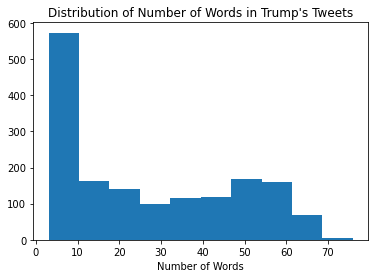

In [30]:
# Number of words

plt.hist(trump_word_counts_list)
plt.title("Distribution of Number of Words in Trump's Tweets")
plt.xlabel("Number of Words")

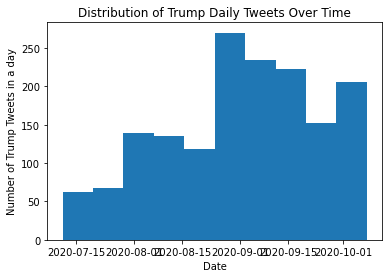

In [31]:
# Tweets per day

plt.hist(trump_tweets['date'])
plt.xlabel('Date')
plt.ylabel('Number of Trump Tweets in a day')
plt.title("Distribution of Trump Daily Tweets Over Time")
plt.show()

Text(0.5, 0, 'Favorites')

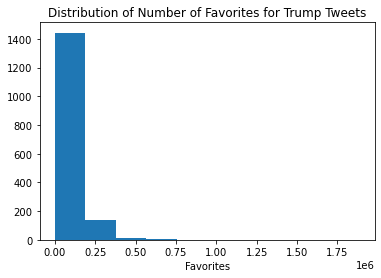

In [34]:
# Favorites

plt.hist(trump_favorites)
plt.title("Distribution of Number of Favorites for Trump Tweets")
plt.xlabel("Favorites")

/Users/chris0519/opt/anaconda3/lib/python3.8/site-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/Users/chris0519/opt/anaconda3/lib/python3.8/site-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


Text(0.5, 0, 'Favorites')

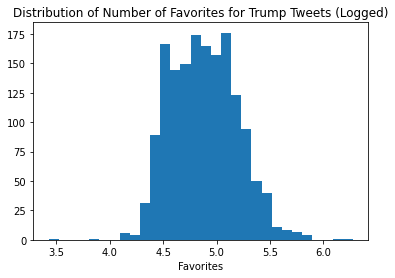

In [58]:
# Favorites logged

trump_favouritelogged=trump_tweets.copy()
trump_favouritelogged['favourite']=np.log10(trump_favouritelogged['favourite'])

trump_favouritelogged=trump_favouritelogged.replace([np.inf, -np.inf], np.nan)

plt.hist(trump_favouritelogged['favourite'], bins = 30)
plt.title("Distribution of Number of Favorites for Trump Tweets (Logged)")
plt.xlabel("Favorites")

Text(0.5, 0, 'Number of Retweets')

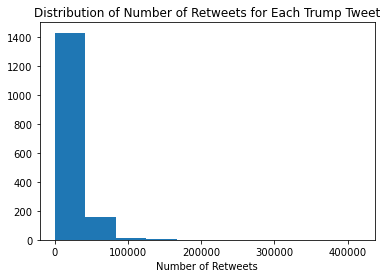

In [47]:
# Retweets

plt.hist(trump_retweets)
plt.title("Distribution of Number of Retweets for Each Trump Tweet")
plt.xlabel("Number of Retweets")

Text(0.5, 0, 'Number of Retweets')

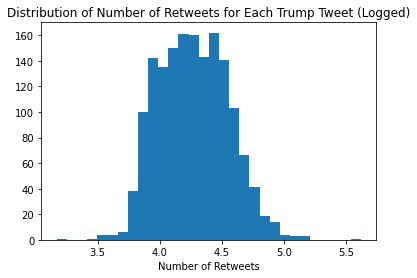

In [62]:
# Retweets logged

trump_retweetslogged=trump_tweets.copy()
trump_retweetslogged['retweets']=np.log10(trump_retweetslogged['retweets'])

trump_retweetslogged=trump_retweetslogged.replace([np.inf, -np.inf], np.nan)

plt.hist(trump_retweetslogged["retweets"], bins = 30)
plt.title("Distribution of Number of Retweets for Each Trump Tweet (Logged)")
plt.xlabel("Number of Retweets")

### Boxplot

Text(0, 0.5, 'Number of Words')

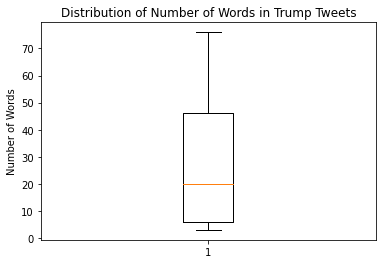

In [49]:
# Number of Words

plt.boxplot(trump_word_counts_list)
plt.title("Distribution of Number of Words in Trump Tweets")
plt.ylabel("Number of Words")

Text(0, 0.5, 'Number of Words')

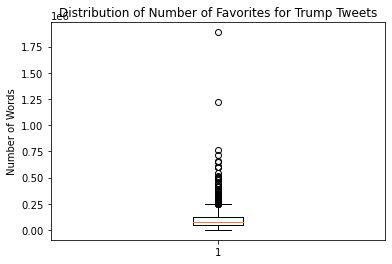

In [50]:
# Favorites

plt.boxplot(trump_favorites)
plt.title("Distribution of Number of Favorites for Trump Tweets")
plt.ylabel("Number of Words")

Text(0, 0.5, 'Number of Retweets')

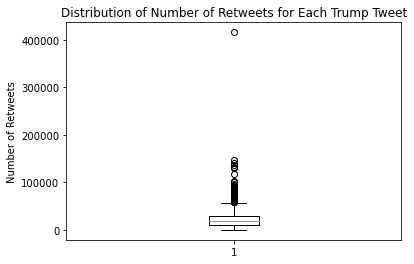

In [51]:
# Retweets

plt.boxplot(trump_retweets)
plt.title("Distribution of Number of Retweets for Each Trump Tweet")
plt.ylabel("Number of Retweets")

### Cross-variable graphs

Text(0.5, 0, 'Number of Words')

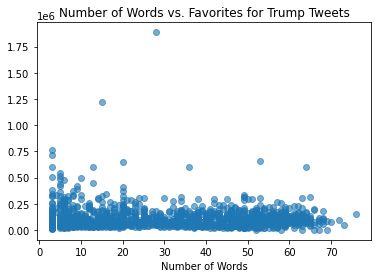

In [52]:
# Number of Words vs. Favorites

plt.scatter(x = trump_word_counts_list, y = trump_favorites, alpha = 0.6)
plt.title("Number of Words vs. Favorites for Trump Tweets")
plt.xlabel("Number of Words")

Text(0.5, 0, 'Number of Words in Tweet')

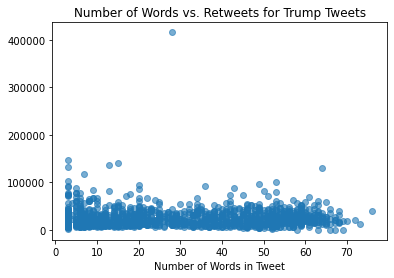

In [53]:
# Number of Words vs. Retweets

plt.scatter(x = trump_word_counts_list, y = trump_retweets, alpha = 0.6)
plt.title("Number of Words vs. Retweets for Trump Tweets")
plt.xlabel("Number of Words in Tweet")

Text(0.5, 0, 'Number of Words in Tweet')

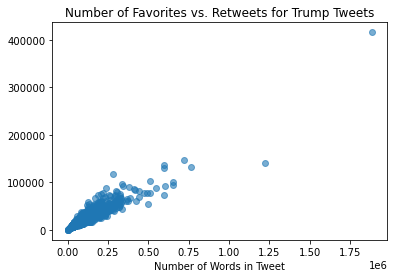

In [55]:
# Number of Favorites vs. Retweets for Trump Tweets

plt.scatter(x = trump_favorites, y = trump_retweets, alpha = 0.6)
plt.title("Number of Favorites vs. Retweets for Trump Tweets")
plt.xlabel("Number of Words in Tweet")

/Users/chris0519/opt/anaconda3/lib/python3.8/site-packages/pandas/core/series.py:679: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


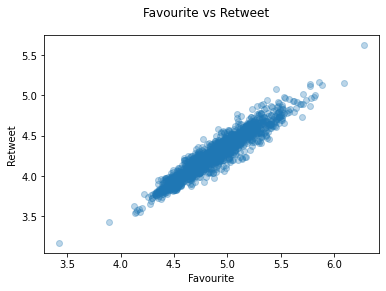

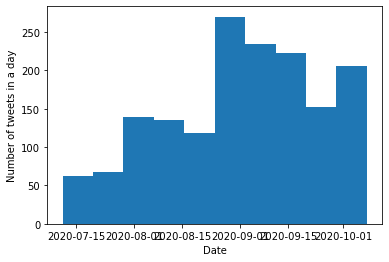

In [54]:
# Number of Favourites vs Retweets for Trump Tweets, logged
favouritelogged=trump_tweets.copy()
retweetslogged=trump_tweets.copy()

favouritelogged['favourite']=np.log10(favouritelogged['favourite'])
retweetslogged['retweets']=np.log10(retweetslogged['retweets'])

plt.scatter(favouritelogged.favourite, retweetslogged.retweets, alpha=0.3)
plt.xlabel('Favourite')
plt.ylabel('Retweet')
plt.suptitle('Favourite vs Retweet')
plt.show()

plt.hist(trump_tweets['date'])
plt.xlabel('Date')
plt.ylabel('Number of tweets in a day')
plt.show()